# Exploring parameters

#### density plots, post predictive checks etc.

In [2]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions as sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [3]:
print(torch.__version__)

1.11.0


In [4]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [5]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [6]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [14]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

work_dir = '/home/ubuntu/'

os.chdir(work_dir)



import os


file = 'multi_round_17params'


print(os.getcwd())

os.chdir('results')


print(os.getcwd())
  

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))

#neural_dens = torch.load('{}/neural_dens.pt'.format(file))
#x_without = torch.load('{}/obs_without.pt'.format(file))

#x = calculate_summary_stats_temporal(x_without)


#true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])
#true_params = torch.tensor([[  18.9700, 63.5300, 137.1200]])
#true_params = torch.load('results/{}/true_params.pt'.format(file))
#true_params = torch.tensor([[0.277, 0.0399, 0.3739, 0.034, 18.977, 0.0115, 0.000012, 0.466, 0.06337, 0.0134, 0.0766, 63.08, 0.000005, 4.6729, 0.0115, 0.3308, 120.86]])

#posteriors_round =  torch.load('{}/posteriors_each_round.pt'.format(file))
#obs_real = torch.load('{}/obs_real.pt'.format(file))

/home/ubuntu
/home/ubuntu/results


In [15]:
#posterior = posteriors_round[1]

In [16]:
#obs_real_stat2 = calculate_summary_stats_temporal(obs_real[0])

samples = posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

acceptance rate:  0.0


                        constant for `log_prob()`. However, only
                        0% posterior samples are within the
                        prior support. It may take a long time to collect the
                        remaining 999 samples.
                        Consider interrupting (Ctrl-C) and either basing the
                        estimate of the normalizing constant on fewer samples (by
                        calling `posterior.leakage_correction(x_o,
                        num_rejection_samples=N)`, where `N` is the number of
                        samples you want to base the
                        estimate on (default N=10000), or not estimating the
                        normalizing constant at all
                        (`log_prob(..., norm_posterior=False)`. The latter will
                        result in an unnormalized `log_prob()`.


acceptance rate:  9.09090909090909e-05
acceptance rate:  0.00014285714285714287
acceptance rate:  9.67741935483871e-05
acceptance rate:  7.317073170731707e-05
acceptance rate:  5.882352941176471e-05
acceptance rate:  6.557377049180328e-05
acceptance rate:  7.042253521126761e-05
acceptance rate:  7.407407407407407e-05
acceptance rate:  6.593406593406593e-05
acceptance rate:  7.920792079207921e-05
acceptance rate:  7.207207207207208e-05
acceptance rate:  7.43801652892562e-05
acceptance rate:  6.870229007633588e-05
acceptance rate:  7.092198581560284e-05
acceptance rate:  7.284768211920529e-05
acceptance rate:  7.453416149068323e-05
acceptance rate:  7.017543859649122e-05
acceptance rate:  7.18232044198895e-05
acceptance rate:  7.329842931937172e-05
acceptance rate:  6.965174129353234e-05
acceptance rate:  6.635071090047393e-05
acceptance rate:  6.787330316742082e-05
acceptance rate:  6.493506493506494e-05
acceptance rate:  6.639004149377594e-05
acceptance rate:  6.374501992031872e-05
acc

acceptance rate:  6.422018348623854e-05
acceptance rate:  6.391158097068717e-05
acceptance rate:  6.360593017694882e-05
acceptance rate:  6.330318895763922e-05
acceptance rate:  6.300331596399811e-05
acceptance rate:  6.27062706270627e-05
acceptance rate:  6.241201313937118e-05
acceptance rate:  6.212050443717888e-05
acceptance rate:  6.183170618317061e-05
acceptance rate:  6.247107820453494e-05
acceptance rate:  6.218332565637955e-05
acceptance rate:  6.235671710224668e-05
acceptance rate:  6.29849383842994e-05
acceptance rate:  6.269877328487052e-05
acceptance rate:  6.241519674355495e-05
acceptance rate:  6.30346690679874e-05
acceptance rate:  6.275212909009412e-05
acceptance rate:  6.247211066488175e-05
acceptance rate:  6.263882718791648e-05
acceptance rate:  6.280406899601946e-05
acceptance rate:  6.252752091589608e-05
acceptance rate:  6.269180184129768e-05
acceptance rate:  6.24181580096028e-05
acceptance rate:  6.214689265536724e-05
acceptance rate:  6.274340112505409e-05
acce

acceptance rate:  6.197046719922537e-05
acceptance rate:  6.182081622796426e-05
acceptance rate:  6.191279209828957e-05
acceptance rate:  6.224465272770969e-05
acceptance rate:  6.20954207624071e-05
acceptance rate:  6.194690265486725e-05
acceptance rate:  6.179909329515629e-05
acceptance rate:  6.165198762199476e-05
acceptance rate:  6.150558062218e-05
acceptance rate:  6.159677801468847e-05
acceptance rate:  6.192389506026944e-05
acceptance rate:  6.201367601980665e-05
acceptance rate:  6.186779581274994e-05
acceptance rate:  6.219197371509036e-05
acceptance rate:  6.228049637087333e-05
acceptance rate:  6.213501518336837e-05
acceptance rate:  6.222325798182242e-05
acceptance rate:  6.207858637526156e-05
acceptance rate:  6.193458594293667e-05
acceptance rate:  6.202267993520018e-05
acceptance rate:  6.211036712075734e-05
acceptance rate:  6.196728864316978e-05
acceptance rate:  6.228453229142726e-05
acceptance rate:  6.2141710616831e-05
acceptance rate:  6.222832303820636e-05
accept

acceptance rate:  5.8566574987866044e-05
acceptance rate:  5.863350024228719e-05
acceptance rate:  5.870020964360587e-05
acceptance rate:  5.860569956528739e-05
acceptance rate:  5.867223918984086e-05
acceptance rate:  5.889905312148933e-05
acceptance rate:  5.880467873738183e-05
acceptance rate:  5.871060630299152e-05
acceptance rate:  5.861683437150615e-05
acceptance rate:  5.8682825705629086e-05
acceptance rate:  5.858939659289922e-05
acceptance rate:  5.86552217453505e-05
acceptance rate:  5.856213299476274e-05
acceptance rate:  5.846933924893044e-05
acceptance rate:  5.885144755576649e-05
acceptance rate:  5.875848996998894e-05
acceptance rate:  5.882352941176471e-05
acceptance rate:  5.8730908518343566e-05
acceptance rate:  5.8638578839805064e-05
acceptance rate:  5.886046146601789e-05
acceptance rate:  5.876821814762576e-05
acceptance rate:  5.898920356751682e-05
acceptance rate:  5.90532729261053e-05
acceptance rate:  5.896116050538138e-05
acceptance rate:  5.886933499454914e-0

acceptance rate:  5.7900498722783114e-05
acceptance rate:  5.78301542947394e-05
acceptance rate:  5.7881325081907536e-05
acceptance rate:  5.80535692643316e-05
acceptance rate:  5.810434572085704e-05
acceptance rate:  5.815499939547818e-05
acceptance rate:  5.8084772370486655e-05
acceptance rate:  5.8014714750934746e-05
acceptance rate:  5.79448259245874e-05
acceptance rate:  5.7995427746360247e-05
acceptance rate:  5.804590794375676e-05
acceptance rate:  5.809626695474733e-05
acceptance rate:  5.802661551372737e-05
acceptance rate:  5.795713088252904e-05
acceptance rate:  5.788781246262409e-05
acceptance rate:  5.781865965834429e-05
acceptance rate:  5.786898938074216e-05
acceptance rate:  5.7800023835061375e-05
acceptance rate:  5.808832281871206e-05
acceptance rate:  5.801926049221258e-05
acceptance rate:  5.806911293195582e-05
acceptance rate:  5.800023721978413e-05
acceptance rate:  5.793152470086483e-05
acceptance rate:  5.809963317950538e-05
acceptance rate:  5.8030965606902256e

acceptance rate:  6.026677051893681e-05
acceptance rate:  6.0208150958078005e-05
acceptance rate:  6.0246817607618306e-05
acceptance rate:  6.028540918357441e-05
acceptance rate:  6.032392590437397e-05
acceptance rate:  6.03623679875981e-05
acceptance rate:  6.040073564998548e-05
acceptance rate:  6.034232666086452e-05
acceptance rate:  6.0284030528451357e-05
acceptance rate:  6.0225846925972394e-05
acceptance rate:  6.016777552791438e-05
acceptance rate:  6.01098160100183e-05
acceptance rate:  6.01482051775575e-05
acceptance rate:  6.0186520526872415e-05
acceptance rate:  6.012871001824993e-05
acceptance rate:  6.016697054025525e-05
acceptance rate:  6.010928961748634e-05
acceptance rate:  6.005171918398621e-05
acceptance rate:  5.999425892259114e-05
acceptance rate:  5.993690851735016e-05
acceptance rate:  5.987966765351924e-05
acceptance rate:  5.991794676080527e-05
acceptance rate:  5.9860833095033835e-05
acceptance rate:  5.989905723264451e-05
acceptance rate:  5.993720863856912e-

acceptance rate:  6.160214268322377e-05
acceptance rate:  6.163328197226502e-05
acceptance rate:  6.174540150717122e-05
acceptance rate:  6.177637438264109e-05
acceptance rate:  6.1807297144244e-05
acceptance rate:  6.183816991350739e-05
acceptance rate:  6.186899281156611e-05
acceptance rate:  6.18997659591639e-05
acceptance rate:  6.19304894766551e-05
acceptance rate:  6.196116348400613e-05
acceptance rate:  6.199178810079703e-05
acceptance rate:  6.194191939506073e-05
acceptance rate:  6.197251024837232e-05
acceptance rate:  6.192273712954782e-05
acceptance rate:  6.195329427814782e-05
acceptance rate:  6.198380242161816e-05
acceptance rate:  6.19341398926368e-05
acceptance rate:  6.188455688095429e-05
acceptance rate:  6.19150467962563e-05
acceptance rate:  6.202541763248341e-05
acceptance rate:  6.197588052072518e-05
acceptance rate:  6.208602665389833e-05
acceptance rate:  6.211625867155729e-05
acceptance rate:  6.214644251454067e-05
acceptance rate:  6.217657829790622e-05
accept

acceptance rate:  6.223489326194284e-05
acceptance rate:  6.219164755750122e-05
acceptance rate:  6.214846191236719e-05
acceptance rate:  6.217472763860939e-05
acceptance rate:  6.21316136190278e-05
acceptance rate:  6.215785461852956e-05
acceptance rate:  6.211481199362924e-05
acceptance rate:  6.214102830253962e-05
acceptance rate:  6.209805684254201e-05
acceptance rate:  6.212424849699398e-05
acceptance rate:  6.215040397762585e-05
acceptance rate:  6.210751500931612e-05
acceptance rate:  6.213364595545134e-05
acceptance rate:  6.215974088622425e-05
acceptance rate:  6.225466565663522e-05
acceptance rate:  6.228064138737871e-05
acceptance rate:  6.223781032941339e-05
acceptance rate:  6.226376194076009e-05
acceptance rate:  6.228967790673717e-05
acceptance rate:  6.245281723972273e-05
acceptance rate:  6.240998559769563e-05
acceptance rate:  6.236721266534164e-05
acceptance rate:  6.252996370111637e-05
acceptance rate:  6.248716720279241e-05
acceptance rate:  6.244442924560564e-05
a

In [19]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [20]:


file = '10000sims_17params_30_04_nsf_fake'
file = '10000sims_17params_01_05_nsf_fake'

#os.chdir('results')

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior1 = torch.load('{}/posterior1.pt'.format(file))
posterior2 = torch.load('{}/posterior2.pt'.format(file))
posterior = torch.load('{}/posterior.pt'.format(file))

posterior_combined = sbi_modulated_functions.Combine_List([posterior1, posterior2, posterior], steps =[0, 6, 12, 17])

In [21]:
samples2 = posterior.sample((1000,))

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

acceptance rate:  1.0


In [22]:
##better limits:

list_min = torch.min(torch.cat((samples2, samples), dim=0), 0)[0]
list_max = torch.max(torch.cat((samples2, samples), dim=0), 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.2

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-5.0450e-01, -1.5498e-03,  4.6933e-05, -1.5433e-01, -4.0454e-02,
         1.2711e+01, -6.3371e-02, -8.4991e-02, -3.3159e-04, -1.2091e-02,
        -2.7982e-03,  4.7657e+01, -3.6135e+00, -1.1083e+00, -1.5576e-02,
        -1.0196e-01,  1.0056e+02])
tensor([7.2912e-01, 1.7807e-01, 2.9446e+00, 1.2004e+00, 1.2155e-01, 4.2084e+01,
        3.7271e+00, 9.6117e+00, 3.3314e-02, 4.6125e-01, 1.5447e-01, 7.0704e+01,
        8.6478e+00, 4.0973e+00, 9.9432e-01, 4.4729e-01, 1.3088e+02])
tensor([0.2467, 0.0359, 0.5889, 0.2710, 0.0324, 5.8745, 0.7581, 1.9393, 0.0067,
        0.0947, 0.0315, 4.6092, 2.4523, 1.0411, 0.2020, 0.1099, 6.0655])


In [24]:
limits[4][0] = -0.01
limits[4][1] = 0.05

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:114: RuntimeWarning: invalid value encountered in true_divide
  cum_probs /= cum_probs[-1]
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:114: RuntimeWarning: invalid value encountered in true_divide
  cum_probs /= cum_probs[-1]
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:114: RuntimeWarning: invalid value encountered in true_divide
  cum_probs /= cum_probs[-1]
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/

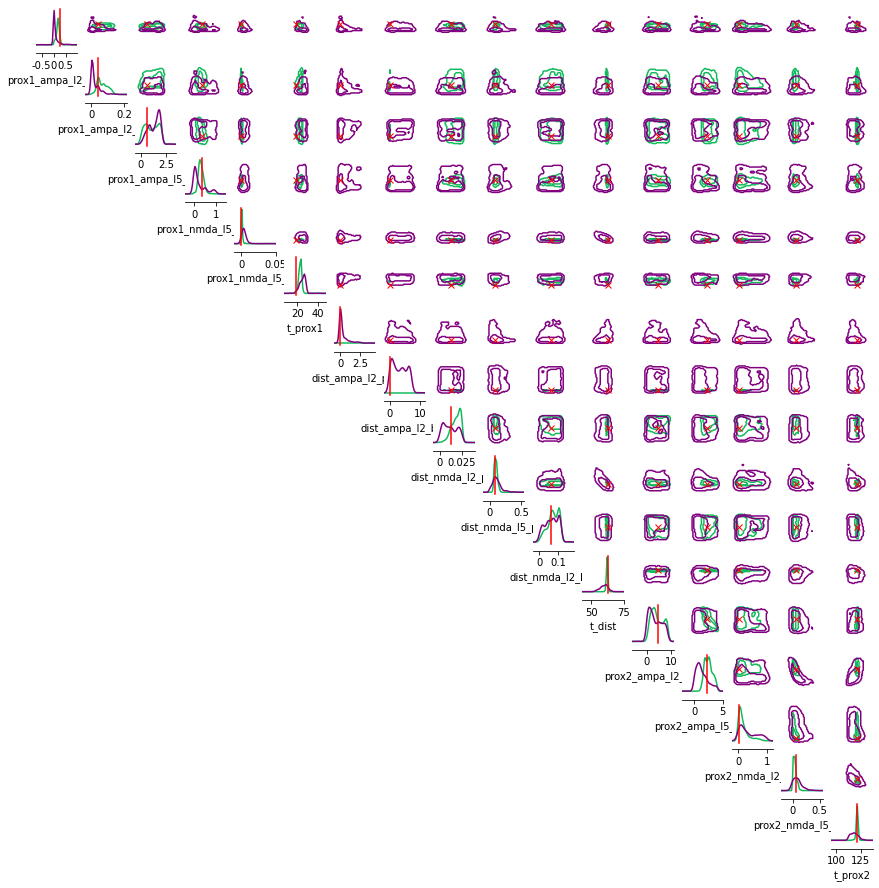

In [25]:
_ = analysis.pairplot(
    samples = [samples, samples2],
    points = true_params,
    limits = limits,
    #subset: List[int] = None,
    upper = "contour",
    diag = "kde",
    figsize = (15, 15),
    labels= parameter_names,

    #ticks: Union[List, torch.Tensor] = [],
    points_colors = 'red',
    kde_offdiag = {
            "alpha": [0.8, 0.2],
            #"edgecolor": "none",
            #"rasterized": False,
            #'s': mpl.rcParams['lines.markersize'] ** 0.5,
            "bw_method": "scott",
            "bins": 50,
            #'cmap': 'viridis'
        },
    hist_offdiag_alpha = 0.02,
    points_offdiag={"markersize": 6, 'marker': 'x'},
    #samples_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    #fig=None,
    #axes=None,
    #**kwargs,
    scatter_offdiag = {
            "alpha": 0.2,
            "edgecolor": "none",
            "rasterized": True,
            's': mpl.rcParams['lines.markersize'] ** 0.5
        },
    contour_offdiag={"levels":  [0.68, 0.95]},
    samples_colors =  ['#12ba5d', '#800080'],
    legend = 'True'
)


In [35]:
plt.savefig('thesis_fig4_10comparison_snpe_nipe')

<Figure size 432x288 with 0 Axes>